# Logistic Regression 

In [1]:
import pandas as pd


import matplotlib.pyplot as plt
import numpy as np


from collections import Counter
from sklearn.model_selection import train_test_split
import seaborn as sns

## First, let's get the files (Dataset from Kaggle) 

In [2]:
df = pd.read_csv('data/breastcancer/data.csv')


### It is always a good idea to check the contents of the data.

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
df.shape

(569, 33)

### check if there is anything on the column Unnamed: 32

In [6]:
sum(np.array(np.isnan(df['Unnamed: 32'].values),dtype=int))

569

let's remove it

In [7]:
df=df[df.columns[:-1]]


Let's remove the first column 'id' as well, since it seems it is not relevant ...

In [8]:
df=df[df.columns[1:]]

In [9]:
predictors=df.columns[1:]

## How many samples in each class

In [10]:
Counter(df.diagnosis)

Counter({'B': 357, 'M': 212})

In [11]:
### In logistic regression highly correlated features may overfit the model, so it is a good idea to check for correlations in the data...

In [12]:
predictors=df.columns[1:]

In [13]:
#df[predictors]

### In Logistic regression highly correlated features may overfit the model, so it is a good idea to check for correlations in the data...

In [14]:
df[predictors].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


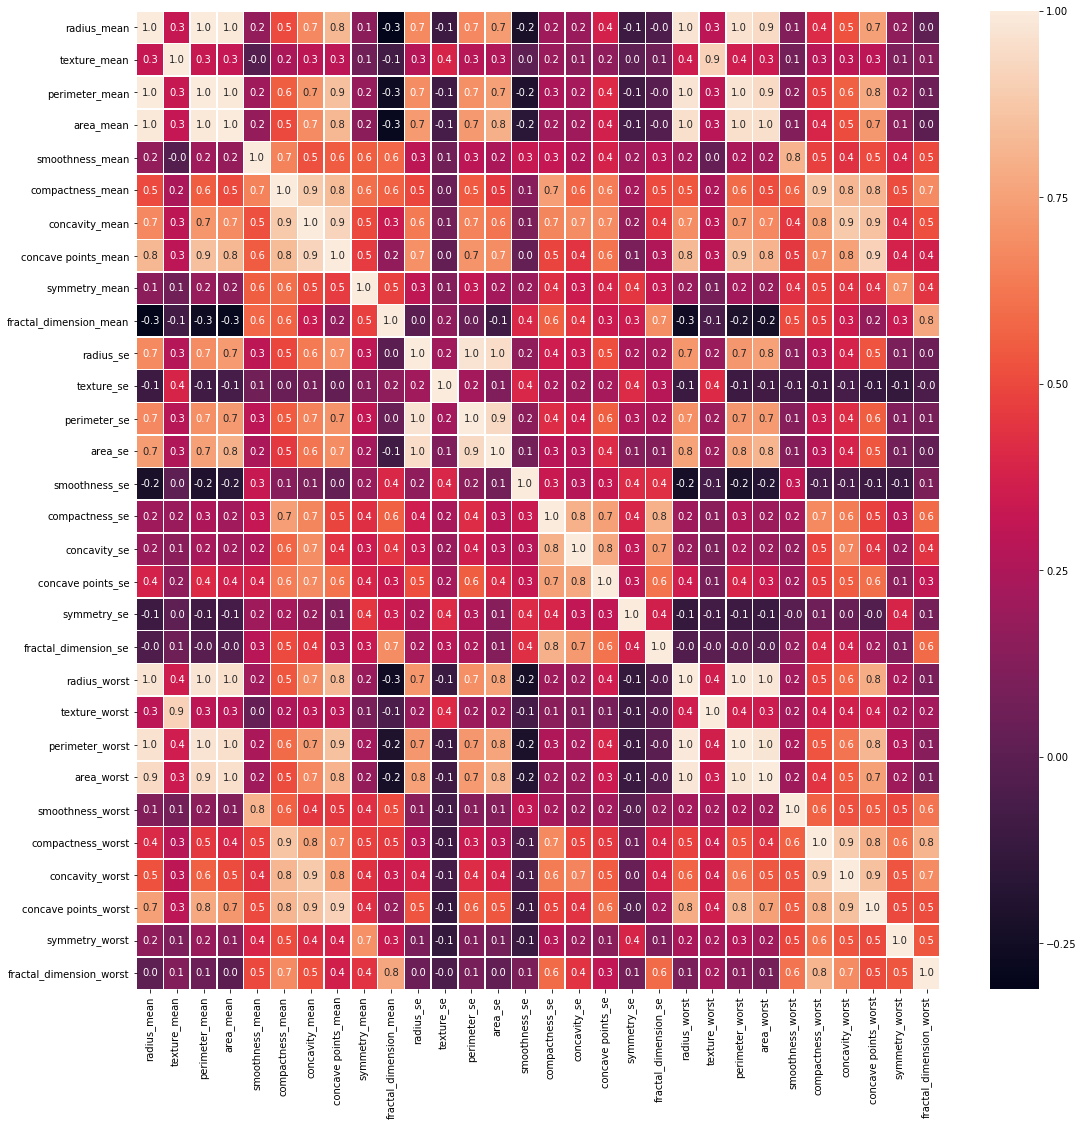

In [15]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df[predictors].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [16]:
def remove_corr_columns(df):
    df_tmp=pd.DataFrame(df[df.columns[0]])
    for i in df.columns[1:]:
        insert_new_column=True
        for j in df_tmp.columns:
            if (abs(df[i].corr(df_tmp[j]))>.6):
                insert_new_column=False
                break
        if insert_new_column:
            df_tmp = pd.concat([df_tmp, df[i]], axis=1)

            #df_tmp.concat(df[i], axis=1)#(df[i])
            
    return df_tmp  

In [17]:
df_tmp=remove_corr_columns(df[df.columns[2:]])

In [18]:
df_tmp.shape

(569, 9)

In [19]:
predictors=df_tmp.columns

In [20]:
df_tmp['diagnosis']=df['diagnosis']

In [21]:
#df_tmp

In [22]:
#lista=['texture_mean','area_mean','smoothness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean','texture_se','area_se','smoothness_se','concavity_se','symmetry_se','fractal_dimension_se','smoothness_worst','concavity_worst','symmetry_worst','fractal_dimension_worst']

In [23]:
#df_tmp.columns

In [24]:
df=df_tmp

In [25]:
df.columns[:-1]

Index(['texture_mean', 'perimeter_mean', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'smoothness_se',
       'compactness_se', 'symmetry_se'],
      dtype='object')

 So now we have 9 columns

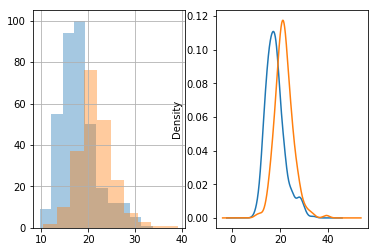

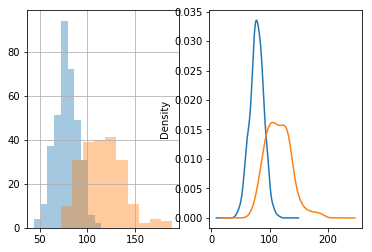

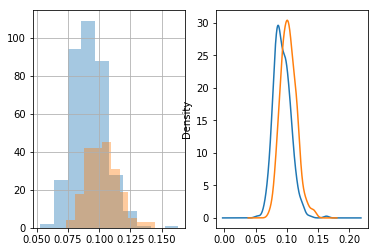

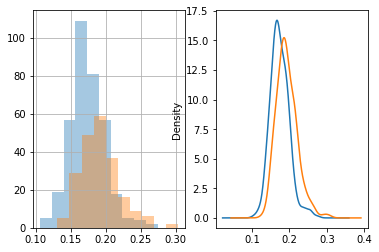

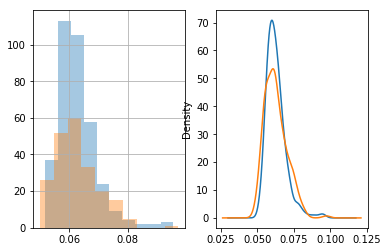

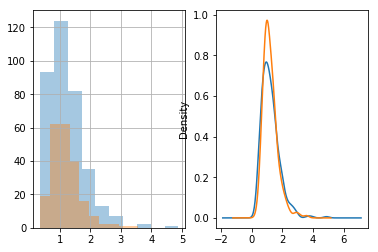

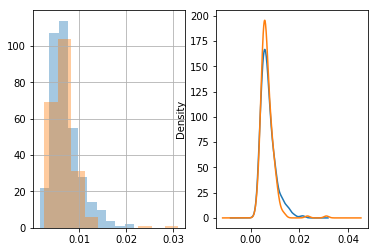

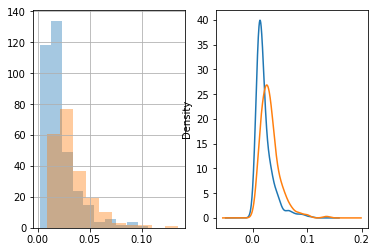

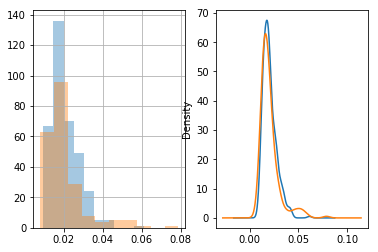

In [26]:


for i in list(df.columns[:-1]):

    #print(i)
    fig, axs = plt.subplots(ncols=2)
    df.groupby("diagnosis")[i].plot(kind='kde', ax=axs[1]);
    df.groupby("diagnosis")[i].hist(alpha=0.4, ax=axs[0]);

 From the histograms, it seems that the first 2 features are the most relevant ones, the 7th and the 9th features do not seem so relevant, since the distribution and density of both classes are very similar.

In [27]:
from sklearn.model_selection import train_test_split


# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df['diagnosis'], test_size=0.3, random_state=42)

In [28]:
y_train=np.array(y_train=='M',dtype=int)
y_test=np.array(y_test=='M',dtype=int)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr=LogisticRegression(C=1000)
lr.fit(X_train,y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

Accuracy is:  0.9590643274853801


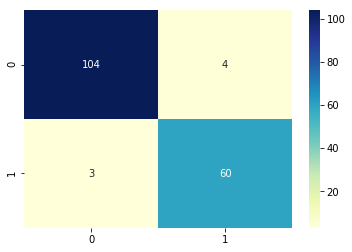

In [42]:
ac = accuracy_score(y_test,lr.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,lr.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d",cmap="YlGnBu");

In [33]:
lr.coef_

array([[  0.34931051,   0.171368  ,  67.92479692,  29.04892304,
         21.86907667,  -0.64980641,  -1.10037429,  -5.614916  ,
        -10.88095083]])

In [34]:
lr.intercept_

array([-35.35541611])

In [35]:
#y_train

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
    parameters = {
        'C': [0.001,0.01,0.1,1,10,100,1000,10000],
        'solver': ['liblinear','newton-cg','lbfgs']
    }
    clf = LogisticRegression(random_state=42, max_iter=10000, tol=0.001)
    gs = GridSearchCV(clf, parameters, scoring='roc_auc', cv=10)
    gs.fit(X_train, y_train)

    print ('gs.best_score_:', gs.best_score_)

gs.best_score_: 0.9806389088298636


In [38]:
gs.best_params_

{'C': 1000, 'solver': 'newton-cg'}

In [39]:
lr=LogisticRegression(C=1000,solver='newton-cg')
lr.fit(X_train,y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

Accuracy is:  0.9590643274853801


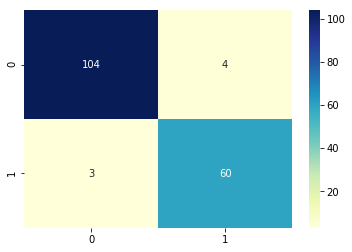

In [41]:
ac = accuracy_score(y_test,lr.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,lr.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d",cmap="YlGnBu");